In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
import statsmodels.tools as sm
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow
from sklearn import linear_model

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_eng = pd.read_excel("thesis_english.xlsx")

In [ ]:
data_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SUPERMARKET_ATT       148 non-null    object
 1   SCENT_T               140 non-null    object
 2   TEMPERATURE_T         140 non-null    object
 3   MUSIC_T               140 non-null    object
 4   LIGHTING_T            140 non-null    object
 5   FLOORING_T            140 non-null    object
 6   CLEANLINESS_T         140 non-null    object
 7   PERSONNEL_T           140 non-null    object
 8   THEME_T               140 non-null    object
 9   SCENT_CH              140 non-null    object
 10  TEMPERATURE_CH        140 non-null    object
 11  MUSIC_CH              140 non-null    object
 12  LIGHTING_CH           140 non-null    object
 13  FLOORING_CH           140 non-null    object
 14  CLEANLINESS_CH        140 non-null    object
 15  PERSONNEL_CH          140 non-null    ob

In [ ]:
data_eng['SUPERMARKET_ATT'] = np.where(data_eng['SUPERMARKET_ATT']=='Yes',1,0)

In [ ]:
data_eng.drop('OTHER',axis='columns', inplace=True)

In [ ]:
data_eng.head()

,SUPERMARKET_ATT,SCENT_T,TEMPERATURE_T,MUSIC_T,LIGHTING_T,FLOORING_T,CLEANLINESS_T,PERSONNEL_T,THEME_T,SCENT_CH,TEMPERATURE_CH,MUSIC_CH,LIGHTING_CH,FLOORING_CH,CLEANLINESS_CH,PERSONNEL_CH,THEME_CH,TIME_SPENT,BROAD_AISLES_MO,COLOR_CODED_PROD_MO,MERCHANDISE_GROUP_MO,PRICE_TAGS_MO,CASH_DESKS_MO,FRONT_DISPLAY_MO,FLOOR_SPACE_MO,BROAD_AISLES_CH,COLOR_CODED_PROD_CH,MERCHANDISE_GROUP_CH,PRICE_TAGS_CH,CASH_DESKS_CH,FRONT_DISPLAY_CH,FLOOR_SPACE_CH,EXCITEMENT,CONFIDENCE,SATISFACTION,HARMONY,HUNGER,SADNESS,TIREDNESS,ANGER,GENDER,AGE,EDUC_LVL,AREA,MRITAL_STATUS,ECON_CHAR,MONTH_INCOME
0,1,Strongly agree [3],Agree [2],Agree [2],Strongly agree [3],Agree [2],Strongly agree [3],Strongly agree [3],Agree [2],Agree [2],Agree [2],Agree [2],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],15-30 minutes,Strongly agree [3],Neutral [0],Agree [2],Neutral [0],Neutral [0],Somewhat agree [1],Strongly agree [3],Strongly agree [3],Somewhat agree [1],Agree [2],Neutral [0],Neutral [0],Agree [2],Strongly agree [3],NaN,Confidence,Satisfaction,Harmony,NaN,NaN,NaN,NaN,Female,15-24,Higher professional,Urban area,Never married,Employed,"69,000AMD - 138,000AMD"
1,1,Somewhat disagree [-1],Somewhat disagree [-1],Agree [2],Agree [2],Agree [2],Somewhat disagree [-1],Somewhat disagree [-1],Somewhat agree [1],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Less than 15 minutes,Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Excitement,NaN,Satisfaction,NaN,NaN,NaN,NaN,NaN,Female,15-24,Higher professional,Urban area,Prefer not to answer,Employed,"69,000AMD - 138,000AMD"
2,1,Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],31-45 minutes,Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Strongly agree [3],Excitement,Confidence,Satisfaction,Harmony,NaN,Sadness,NaN,Anger,Female,15-24,Primary professional,Urban area,Never married,Employed,"139,000AMD - 208,000AMD"
3,1,Agree [2],Agree [2],Somewhat agree [1],Somewhat agree [1],Somewhat agree [1],Strongly agree [3],Agree [2],Somewhat agree [1],Agree [2],Agree [2],Somewhat agree [1],Somewhat agree [1],Somewhat agree [1],Agree [2],Agree [2],Somewhat agree [1],15-30 minutes,Somewhat agree [1],Somewhat agree [1],Neutral [0],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Agree [2],Neutral [0],Neutral [0],Agree [2],Agree [2],Agree [2],NaN,NaN,Satisfaction,Harmony,Hunger,NaN,NaN,NaN,Female,15-24,Higher professional,Urban area,Never married,Prefer not to answer,Prefer not to answer
4,1,Agree [2],Neutral [0],Agree [2],Somewhat agree [1],Neutral [0],Somewhat agree [1],Agree [2],Somewhat agree [1],Somewhat agree [1],Neutral [0],Neutral [0],Neutral [0],Neutral [0],Neutral [0],Somewhat agree [1],Neutral [0],15-30 minutes,Somewhat agree [1],Somewhat agree [1],Somewhat agree [1],Neutral [0],Neutral [0],Neutral [0],Somewhat agree [1],Somewhat agree [1],Somewhat agree [1],Somewhat agree [1],Neutral [0],Neutral [0],Neutral [0],Somewhat agree [1],NaN,NaN,NaN,NaN,Hunger,NaN,NaN,NaN,Female,25-34,Higher professional,Urban area,Never married,Employed,"139,000AMD - 208,000AMD"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


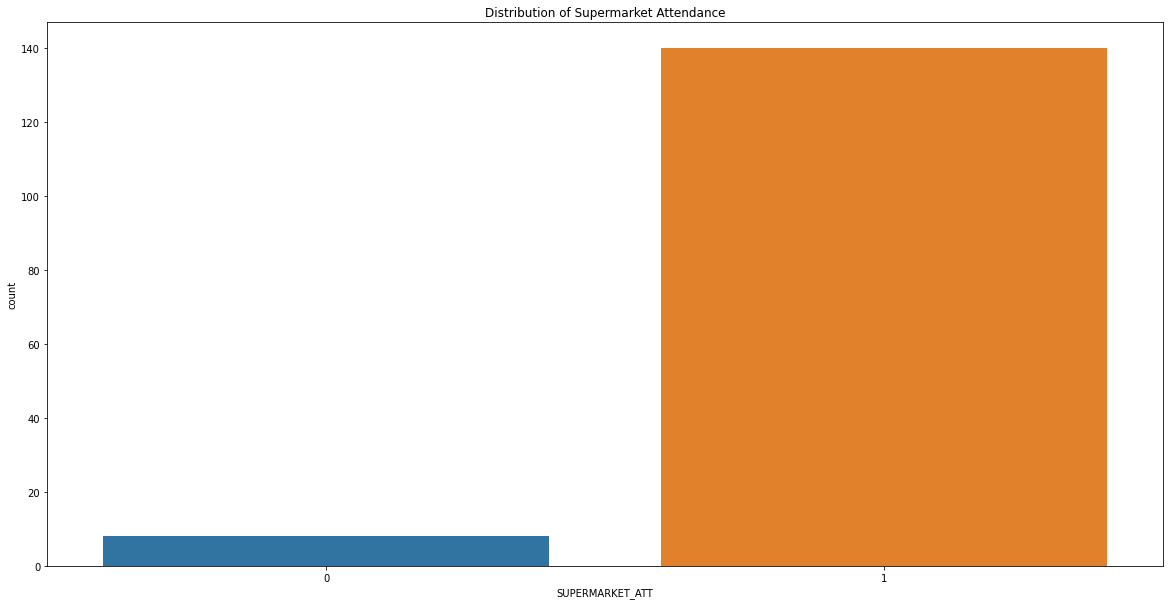

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data_eng.SUPERMARKET_ATT)
plt.title("Distribution of Supermarket Attendance")
plt.show()

In [ ]:
data_eng.SUPERMARKET_ATT.value_counts(normalize=True).mul(100).rename("Supermarket Attendance Percentage")

1    94.594595
0     5.405405
Name: Supermarket Attendance Percentage, dtype: float64

In [ ]:
SCENT_T = data_eng['SCENT_T'].dropna()

In [ ]:
SCENT_T.unique()

array(['Strongly agree [3]', 'Somewhat disagree [-1]', 'Agree [2]',
       'Neutral [0]', 'Somewhat agree [1]', 'Strongly disagree [-3]',
       'Disagree [-2]'], dtype=object)

In [ ]:
replace = {'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                    'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}

In [ ]:
SCENT_T = SCENT_T.replace(replace)

In [ ]:
medHyp = 4

In [ ]:
rank, pVal = wilcoxon(SCENT_T-medHyp, zero_method = "wilcox", correction = False)
print(rank)
print(pVal)

714.0
2.2669547872462317e-12


In [ ]:
from scipy.stats import norm

In [ ]:
norm.ppf(pVal/2)

-7.016992064809889

In [ ]:
from statistics import mean

In [ ]:
def wilcoxonOS(myData, field, catCoding=None, hypMed = None):
    myField = myData[field].dropna()

    if catCoding != None:
        myField = myField.replace(catCoding)
    myFreq = myField.value_counts()

    myMed = hypMed
    if hypMed == None:
        myMed = (min(myFreq.index)+max(myFreq.index))/2

    rank, pVal = wilcoxon(myField-myMed, zero_method = 'wilcox', correction = False)
    zVal = norm.ppf(pVal/2)

    return rank, pVal, zVal, myMed

In [ ]:
wilcoxonOS(data_eng, 'TEMPERATURE_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(52.5, 1.2111350865396998e-21, -9.557090616515756, 4)

In [ ]:
wilcoxonOS(data_eng, 'MUSIC_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(698.5, 1.8833742714231807e-11, -6.714789869281158, 4)

In [ ]:
wilcoxonOS(data_eng, 'LIGHTING_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(323.0, 8.302909812465916e-19, -8.855876057817678, 4)

In [ ]:
wilcoxonOS(data_eng, 'FLOORING_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(694.0, 1.4866363514237636e-10, -6.40674039013732, 4)

In [ ]:
wilcoxonOS(data_eng, 'CLEANLINESS_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(61.0, 1.8867142023075704e-23, -9.978833675533876, 4)

In [ ]:
wilcoxonOS(data_eng, 'PERSONNEL_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(85.0, 1.3932279255827152e-22, -9.778453667093222, 4)

In [ ]:
wilcoxonOS(data_eng, 'THEME_T', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(106.5, 3.196148963200931e-19, -8.961733035649027, 4)

In [ ]:
wilcoxonOS(data_eng, 'THEME_CH', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(199.0, 2.0628361276665817e-17, -8.490198973366978, 4)

In [ ]:
wilcoxonOS(data_eng, 'PERSONNEL_CH', catCoding={'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                                                 'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}, hypMed = 4)

(172.5, 8.27799511300186e-23, -9.831015302152405, 4)

In [ ]:
data_eng.SCENT_T[data_eng.SCENT_T == 'Strongly disagree [-3]'] = 1
data_eng.SCENT_T[data_eng.SCENT_T == 'Disagree [-2]'] = 2
data_eng.SCENT_T[data_eng.SCENT_T == 'Somewhat disagree [-1]'] = 3
data_eng.SCENT_T[data_eng.SCENT_T == 'Neutral [0]'] = 4
data_eng.SCENT_T[data_eng.SCENT_T == 'Somewhat agree [1]'] = 5
data_eng.SCENT_T[data_eng.SCENT_T == 'Agree [2]'] = 6
data_eng.SCENT_T[data_eng.SCENT_T == 'Strongly agree [3]'] = 7
#data_eng['SCENT_T']= data_eng['SCENT_T'].astype("int")

data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Strongly disagree [-3]'] = 1
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Disagree [-2]'] = 2
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Somewhat disagree [-1]'] = 3
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Neutral [0]'] = 4
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Somewhat agree [1]'] = 5
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Agree [2]'] = 6
data_eng.TEMPERATURE_T[data_eng.TEMPERATURE_T == 'Strongly agree [3]'] = 7
#data_eng['TEMPERATURE_T']= data_eng['TEMPERATURE_T'].astype("int")

data_eng.MUSIC_T[data_eng.MUSIC_T == 'Strongly disagree [-3]'] = 1
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Disagree [-2]'] = 2
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Somewhat disagree [-1]'] = 3
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Neutral [0]'] = 4
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Somewhat agree [1]'] = 5
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Agree [2]'] = 6
data_eng.MUSIC_T[data_eng.MUSIC_T == 'Strongly agree [3]'] = 7
#data_eng['MUSIC_T']= data_eng['MUSIC_T'].astype("int")

data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Strongly disagree [-3]'] = 1
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Disagree [-2]'] = 2
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Somewhat disagree [-1]'] = 3
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Neutral [0]'] = 4
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Somewhat agree [1]'] = 5
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Agree [2]'] = 6
data_eng.LIGHTING_T[data_eng.LIGHTING_T == 'Strongly agree [3]'] = 7
#data_eng['LIGHTING_T']= data_eng['LIGHTING_T'].astype("int")

data_eng.FLOORING_T[data_eng.FLOORING_T == 'Strongly disagree [-3]'] = 1
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Disagree [-2]'] = 2
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Somewhat disagree [-1]'] = 3
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Neutral [0]'] = 4
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Somewhat agree [1]'] = 5
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Agree [2]'] = 6
data_eng.FLOORING_T[data_eng.FLOORING_T == 'Strongly agree [3]'] = 7
#data_eng['FLOORING_T']= data_eng['FLOORING_T'].astype("int")

data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Strongly disagree [-3]'] = 1
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Disagree [-2]'] = 2
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Somewhat disagree [-1]'] = 3
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Neutral [0]'] = 4
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Somewhat agree [1]'] = 5
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Agree [2]'] = 6
data_eng.CLEANLINESS_T[data_eng.CLEANLINESS_T == 'Strongly agree [3]'] = 7
#data_eng['CLEANLINESS_T']= data_eng['CLEANLINESS_T'].astype("int")

data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Strongly disagree [-3]'] = 1
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Disagree [-2]'] = 2
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Somewhat disagree [-1]'] = 3
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Neutral [0]'] = 4
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Somewhat agree [1]'] = 5
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Agree [2]'] = 6
data_eng.PERSONNEL_T[data_eng.PERSONNEL_T == 'Strongly agree [3]'] = 7
#data_eng['PERSONNEL_T']= data_eng['PERSONNEL_T'].astype("int")

data_eng.THEME_T[data_eng.THEME_T == 'Strongly disagree [-3]'] = 1
data_eng.THEME_T[data_eng.THEME_T == 'Disagree [-2]'] = 2
data_eng.THEME_T[data_eng.THEME_T == 'Somewhat disagree [-1]'] = 3
data_eng.THEME_T[data_eng.THEME_T == 'Neutral [0]'] = 4
data_eng.THEME_T[data_eng.THEME_T == 'Somewhat agree [1]'] = 5
data_eng.THEME_T[data_eng.THEME_T == 'Agree [2]'] = 6
data_eng.THEME_T[data_eng.THEME_T == 'Strongly agree [3]'] = 7
#data_eng['THEME_T']= data_eng['THEME_T'].astype("int")

data_eng.SCENT_CH[data_eng.SCENT_CH == 'Strongly disagree [-3]'] = 1
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Disagree [-2]'] = 2
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Somewhat disagree [-1]'] = 3
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Neutral [0]'] = 4
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Somewhat agree [1]'] = 5
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Agree [2]'] = 6
data_eng.SCENT_CH[data_eng.SCENT_CH == 'Strongly agree [3]'] = 7
#data_eng['SCENT_CH']= data_eng['SCENT_CH'].astype("int")

data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Strongly disagree [-3]'] = 1
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Disagree [-2]'] = 2
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Somewhat disagree [-1]'] = 3
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Neutral [0]'] = 4
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Somewhat agree [1]'] = 5
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Agree [2]'] = 6
data_eng.TEMPERATURE_CH[data_eng.TEMPERATURE_CH == 'Strongly agree [3]'] = 7
#data_eng['TEMPERATURE_CH']= data_eng['TEMPERATURE_CH'].astype("int")

data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Strongly disagree [-3]'] = 1
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Disagree [-2]'] = 2
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Somewhat disagree [-1]'] = 3
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Neutral [0]'] = 4
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Somewhat agree [1]'] = 5
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Agree [2]'] = 6
data_eng.MUSIC_CH[data_eng.MUSIC_CH == 'Strongly agree [3]'] = 7
#data_eng['MUSIC_CH']= data_eng['MUSIC_CH'].astype("int")

data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Strongly disagree [-3]'] = 1
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Disagree [-2]'] = 2
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Somewhat disagree [-1]'] = 3
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Neutral [0]'] = 4
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Somewhat agree [1]'] = 5
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Agree [2]'] = 6
data_eng.LIGHTING_CH[data_eng.LIGHTING_CH == 'Strongly agree [3]'] = 7
#data_eng['LIGHTING_CH']= data_eng['LIGHTING_CH'].astype("int")

data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Strongly disagree [-3]'] = 1
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Disagree [-2]'] = 2
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Somewhat disagree [-1]'] = 3
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Neutral [0]'] = 4
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Somewhat agree [1]'] = 5
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Agree [2]'] = 6
data_eng.FLOORING_CH[data_eng.FLOORING_CH == 'Strongly agree [3]'] = 7
#data_eng['FLOORING_CH']= data_eng['FLOORING_CH'].astype("int")

data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Strongly disagree [-3]'] = 1
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Disagree [-2]'] = 2
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Somewhat disagree [-1]'] = 3
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Neutral [0]'] = 4
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Somewhat agree [1]'] = 5
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Agree [2]'] = 6
data_eng.CLEANLINESS_CH[data_eng.CLEANLINESS_CH == 'Strongly agree [3]'] = 7
#data_eng['CLEANLINESS_CH']= data_eng['CLEANLINESS_CH'].astype("int")

data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Strongly disagree [-3]'] = 1
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Disagree [-2]'] = 2
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Somewhat disagree [-1]'] = 3
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Neutral [0]'] = 4
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Somewhat agree [1]'] = 5
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Agree [2]'] = 6
data_eng.PERSONNEL_CH[data_eng.PERSONNEL_CH == 'Strongly agree [3]'] = 7
#data_eng['PERSONNEL_CH']= data_eng['PERSONNEL_CH'].astype("int")

data_eng.THEME_CH[data_eng.THEME_CH == 'Strongly disagree [-3]'] = 1
data_eng.THEME_CH[data_eng.THEME_CH == 'Disagree [-2]'] = 2
data_eng.THEME_CH[data_eng.THEME_CH == 'Somewhat disagree [-1]'] = 3
data_eng.THEME_CH[data_eng.THEME_CH == 'Neutral [0]'] = 4
data_eng.THEME_CH[data_eng.THEME_CH == 'Somewhat agree [1]'] = 5
data_eng.THEME_CH[data_eng.THEME_CH == 'Agree [2]'] = 6
data_eng.THEME_CH[data_eng.THEME_CH == 'Strongly agree [3]'] = 7
#data_eng['THEME_CH']= data_eng['THEME_CH'].astype("int")

data_eng.TIME_SPENT[data_eng.TIME_SPENT == 'Less than 15 minutes'] = 1
data_eng.TIME_SPENT[data_eng.TIME_SPENT == '15-30 minutes'] = 2
data_eng.TIME_SPENT[data_eng.TIME_SPENT == '31-45 minutes'] = 3
data_eng.TIME_SPENT[data_eng.TIME_SPENT == 'More than 45 minutes'] = 4
#data_eng['TIME_SPENT']= data_eng['TIME_SPENT'].astype("int")



data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Strongly disagree [-3]'] = 1
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Disagree [-2]'] = 2
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Somewhat disagree [-1]'] = 3
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Neutral [0]'] = 4
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Somewhat agree [1]'] = 5
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Agree [2]'] = 6
data_eng.BROAD_AISLES_MO[data_eng.BROAD_AISLES_MO == 'Strongly agree [3]'] = 7
#data_eng['BROAD_AISLES_MO']= data_eng['BROAD_AISLES_MO'].astype("int")

data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Strongly disagree [-3]'] = 1
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Disagree [-2]'] = 2
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat disagree [-1]'] = 3
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Neutral [0]'] = 4
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat agree [1]'] = 5
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Agree [2]'] = 6
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Strongly agree [3]'] = 7
#data_eng['COLOR_CODED_PROD_MO']= data_eng['COLOR_CODED_PROD_MO'].astype("int")

data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Strongly disagree [-3]'] = 1
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Disagree [-2]'] = 2
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat disagree [-1]'] = 3
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Neutral [0]'] = 4
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat agree [1]'] = 5
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Agree [2]'] = 6
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Strongly agree [3]'] = 7
#data_eng['COLOR_CODED_PROD_MO']= data_eng['COLOR_CODED_PROD_MO'].astype("int")

data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Strongly disagree [-3]'] = 1
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Disagree [-2]'] = 2
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Somewhat disagree [-1]'] = 3
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Neutral [0]'] = 4
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Somewhat agree [1]'] = 5
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Agree [2]'] = 6
data_eng.MERCHANDISE_GROUP_MO[data_eng.MERCHANDISE_GROUP_MO == 'Strongly agree [3]'] = 7
#data_eng['MERCHANDISE_GROUP_MO']= data_eng['MERCHANDISE_GROUP_MO'].astype("int")

data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Strongly disagree [-3]'] = 1
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Disagree [-2]'] = 2
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Somewhat disagree [-1]'] = 3
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Neutral [0]'] = 4
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Somewhat agree [1]'] = 5
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Agree [2]'] = 6
data_eng.PRICE_TAGS_MO[data_eng.PRICE_TAGS_MO == 'Strongly agree [3]'] = 7
#data_eng['PRICE_TAGS_MO']= data_eng['PRICE_TAGS_MO'].astype("int")

data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Strongly disagree [-3]'] = 1
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Disagree [-2]'] = 2
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Somewhat disagree [-1]'] = 3
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Neutral [0]'] = 4
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Somewhat agree [1]'] = 5
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Agree [2]'] = 6
data_eng.CASH_DESKS_MO[data_eng.CASH_DESKS_MO == 'Strongly agree [3]'] = 7
#data_eng['CASH_DESKS_MO']= data_eng['CASH_DESKS_MO'].astype("int")

data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Strongly disagree [-3]'] = 1
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Disagree [-2]'] = 2
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Somewhat disagree [-1]'] = 3
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Neutral [0]'] = 4
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Somewhat agree [1]'] = 5
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Agree [2]'] = 6
data_eng.FRONT_DISPLAY_MO[data_eng.FRONT_DISPLAY_MO == 'Strongly agree [3]'] = 7
#data_eng['FRONT_DISPLAY_MO']= data_eng['FRONT_DISPLAY_MO'].astype("int")

data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Strongly disagree [-3]'] = 1
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Disagree [-2]'] = 2
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Somewhat disagree [-1]'] = 3
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Neutral [0]'] = 4
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Somewhat agree [1]'] = 5
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Agree [2]'] = 6
data_eng.FLOOR_SPACE_MO[data_eng.FLOOR_SPACE_MO == 'Strongly agree [3]'] = 7
#data_eng['FLOOR_SPACE_MO']= data_eng['FLOOR_SPACE_MO'].astype("int")

##

data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Strongly disagree [-3]'] = 1
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Disagree [-2]'] = 2
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Somewhat disagree [-1]'] = 3
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Neutral [0]'] = 4
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Somewhat agree [1]'] = 5
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Agree [2]'] = 6
data_eng.BROAD_AISLES_CH[data_eng.BROAD_AISLES_CH == 'Strongly agree [3]'] = 7
#data_eng['BROAD_AISLES_CH']= data_eng['BROAD_AISLES_CH'].astype("int")

data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Strongly disagree [-3]'] = 1
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Disagree [-2]'] = 2
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Somewhat disagree [-1]'] = 3
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Neutral [0]'] = 4
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Somewhat agree [1]'] = 5
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Agree [2]'] = 6
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Strongly agree [3]'] = 7
#data_eng['COLOR_CODED_PROD_CH']= data_eng['COLOR_CODED_PROD_CH'].astype("int")

data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Strongly disagree [-3]'] = 1
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Disagree [-2]'] = 2
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Somewhat disagree [-1]'] = 3
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Neutral [0]'] = 4
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Somewhat agree [1]'] = 5
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Agree [2]'] = 6
data_eng.COLOR_CODED_PROD_CH[data_eng.COLOR_CODED_PROD_CH == 'Strongly agree [3]'] = 7
#data_eng['COLOR_CODED_PROD_CH']= data_eng['COLOR_CODED_PROD_CH'].astype("int")

data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Strongly disagree [-3]'] = 1
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Disagree [-2]'] = 2
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Somewhat disagree [-1]'] = 3
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Neutral [0]'] = 4
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Somewhat agree [1]'] = 5
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Agree [2]'] = 6
data_eng.MERCHANDISE_GROUP_CH[data_eng.MERCHANDISE_GROUP_CH == 'Strongly agree [3]'] = 7
#data_eng['MERCHANDISE_GROUP_CH']= data_eng['MERCHANDISE_GROUP_CH'].astype("int")

data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Strongly disagree [-3]'] = 1
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Disagree [-2]'] = 2
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Somewhat disagree [-1]'] = 3
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Neutral [0]'] = 4
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Somewhat agree [1]'] = 5
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Agree [2]'] = 6
data_eng.PRICE_TAGS_CH[data_eng.PRICE_TAGS_CH == 'Strongly agree [3]'] = 7
#data_eng['PRICE_TAGS_CH']= data_eng['PRICE_TAGS_CH'].astype("int")

data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Strongly disagree [-3]'] = 1
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Disagree [-2]'] = 2
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Somewhat disagree [-1]'] = 3
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Neutral [0]'] = 4
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Somewhat agree [1]'] = 5
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Agree [2]'] = 6
data_eng.CASH_DESKS_CH[data_eng.CASH_DESKS_CH == 'Strongly agree [3]'] = 7
#data_eng['CASH_DESKS_CH']= data_eng['CASH_DESKS_CH'].astype("int")

data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Strongly disagree [-3]'] = 1
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Disagree [-2]'] = 2
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Somewhat disagree [-1]'] = 3
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Neutral [0]'] = 4
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Somewhat agree [1]'] = 5
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Agree [2]'] = 6
data_eng.FRONT_DISPLAY_CH[data_eng.FRONT_DISPLAY_CH == 'Strongly agree [3]'] = 7
#data_eng['FRONT_DISPLAY_CH']= data_eng['FRONT_DISPLAY_CH'].astype("int")

data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Strongly disagree [-3]'] = 1
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Disagree [-2]'] = 2
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Somewhat disagree [-1]'] = 3
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Neutral [0]'] = 4
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Somewhat agree [1]'] = 5
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Agree [2]'] = 6
data_eng.FLOOR_SPACE_CH[data_eng.FLOOR_SPACE_CH == 'Strongly agree [3]'] = 7
#data_eng['FLOOR_SPACE_CH']= data_eng['FLOOR_SPACE_CH'].astype("int")


data_eng['EXCITEMENT'] = data_eng['EXCITEMENT'].fillna(0)
data_eng.EXCITEMENT[data_eng.EXCITEMENT == 'Excitement'] = 1
#data_eng['EXCITEMENT']= data_eng['EXCITEMENT'].astype("int")

data_eng['CONFIDENCE'] = data_eng['CONFIDENCE'].fillna(0)
data_eng.CONFIDENCE[data_eng.CONFIDENCE == 'Confidence'] = 1
#data_eng['CONFIDENCE']= data_eng['CONFIDENCE'].astype("int")

data_eng['SATISFACTION'] = data_eng['SATISFACTION'].fillna(0)
data_eng.SATISFACTION[data_eng.SATISFACTION == 'Satisfaction'] = 1
#data_eng['SATISFACTION']= data_eng['SATISFACTION'].astype("int")

data_eng['HARMONY'] = data_eng['HARMONY'].fillna(0)
data_eng.HARMONY[data_eng.HARMONY == 'Harmony'] = 1
#data_eng['HARMONY']= data_eng['HARMONY'].astype("int")

data_eng['HUNGER'] = data_eng['HUNGER'].fillna(0)
data_eng.HUNGER[data_eng.HUNGER == 'Hunger'] = 1
#data_eng['HUNGER']= data_eng['HUNGER'].astype("int")

data_eng['SADNESS'] = data_eng['SADNESS'].fillna(0)
data_eng.SADNESS[data_eng.SADNESS == 'Sadness'] = 1
#data_eng['SADNESS']= data_eng['SADNESS'].astype("int")

data_eng['TIREDNESS'] = data_eng['TIREDNESS'].fillna(0)
data_eng.TIREDNESS[data_eng.TIREDNESS == 'Tiredness'] = 1
#data_eng['TIREDNESS']= data_eng['TIREDNESS'].astype("int")

data_eng['ANGER'] = data_eng['ANGER'].fillna(0)
data_eng.ANGER[data_eng.ANGER == 'Anger'] = 1
#data_eng['ANGER']= data_eng['ANGER'].astype("int")



data_eng.GENDER[data_eng.GENDER == 'Female'] = 1
data_eng.GENDER[data_eng.GENDER == 'Male'] = 2
data_eng.drop(data_eng.index[data_eng['GENDER']=="Other"], inplace = True)
#data_eng['GENDER']= data_eng['GENDER'].astype("int")


data_eng.AGE[data_eng.AGE == '15-24'] = 1
data_eng.AGE[data_eng.AGE == '25-34'] = 2
data_eng.AGE[data_eng.AGE == '35-44'] = 3
data_eng.AGE[data_eng.AGE == '45-54'] = 4
data_eng.AGE[data_eng.AGE == '55-64'] = 5
data_eng.AGE[data_eng.AGE == '65 and older'] = 6
data_eng.AGE[data_eng.AGE == 'Prefer not to answer'] = 7
#data_eng['AGE']= data_eng['AGE'].astype("int")


data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Primary'] = 1
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Secondary'] = 2
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Primary professional'] = 3
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Secondary professional'] = 4
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Higher professional'] = 5
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'higher professional'] = 5
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Post-graduate professional'] = 6
data_eng.EDUC_LVL[data_eng.EDUC_LVL == 'Prefer not to answer'] = 7
data_eng.drop(data_eng.index[data_eng['EDUC_LVL']=="Other, please specify"], inplace = True)
#data_eng['EDUC_LVL']= data_eng['EDUC_LVL'].astype("int")


data_eng.AREA[data_eng.AREA == 'Urban area'] = 1
data_eng.AREA[data_eng.AREA == 'Rural area'] = 2
data_eng.AREA[data_eng.AREA == 'Prefer not to answer'] = 3
#data_eng['AREA']= data_eng['AREA'].astype("int")


data_eng.MRITAL_STATUS[data_eng.MRITAL_STATUS == 'Never married'] = 1
data_eng.MRITAL_STATUS[data_eng.MRITAL_STATUS == 'Married (registered)'] = 2
data_eng.MRITAL_STATUS[data_eng.MRITAL_STATUS == 'Divorced (registered)'] = 3
data_eng.MRITAL_STATUS[data_eng.MRITAL_STATUS == 'Widowed'] = 4
data_eng.MRITAL_STATUS[data_eng.MRITAL_STATUS == 'Prefer not to answer'] = 5
data_eng.drop(data_eng.index[data_eng['MRITAL_STATUS']=="Other, please specify"], inplace = True)
#data_eng['MRITAL_STATUS']= data_eng['MRITAL_STATUS'].astype("int")



data_eng.ECON_CHAR[data_eng.ECON_CHAR == 'Economically active*'] = 1
data_eng.ECON_CHAR[data_eng.ECON_CHAR == 'Employed'] = 2
data_eng.ECON_CHAR[data_eng.ECON_CHAR == 'Unemployed'] = 3
data_eng.ECON_CHAR[data_eng.ECON_CHAR == 'Economically inactive (attending educational institution, old age/health, engaged in household duties, going to leave the country)'] = 4
data_eng.ECON_CHAR[data_eng.ECON_CHAR == 'Prefer not to answer'] = 5
#data_eng['ECON_CHAR']= data_eng['ECON_CHAR'].astype("int")


data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '68,000AMD or less'] = 1
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '69,000AMD - 138,000AMD'] = 2
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '139,000AMD - 208,000AMD'] = 3
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '209,000AMD - 278,000AMD'] = 4
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '279,000AMD - 348,000AMD'] = 5
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == '349,000AMD and higher'] = 6
data_eng.MONTH_INCOME[data_eng.MONTH_INCOME == 'Prefer not to answer'] = 7
#data_eng['MONTH_INCOME']= data_eng['MONTH_INCOME'].astype("int")



In [ ]:
data_eng.head()

,SUPERMARKET_ATT,SCENT_T,TEMPERATURE_T,MUSIC_T,LIGHTING_T,FLOORING_T,CLEANLINESS_T,PERSONNEL_T,THEME_T,SCENT_CH,TEMPERATURE_CH,MUSIC_CH,LIGHTING_CH,FLOORING_CH,CLEANLINESS_CH,PERSONNEL_CH,THEME_CH,TIME_SPENT,BROAD_AISLES_MO,COLOR_CODED_PROD_MO,MERCHANDISE_GROUP_MO,PRICE_TAGS_MO,CASH_DESKS_MO,FRONT_DISPLAY_MO,FLOOR_SPACE_MO,BROAD_AISLES_CH,COLOR_CODED_PROD_CH,MERCHANDISE_GROUP_CH,PRICE_TAGS_CH,CASH_DESKS_CH,FRONT_DISPLAY_CH,FLOOR_SPACE_CH,EXCITEMENT,CONFIDENCE,SATISFACTION,HARMONY,HUNGER,SADNESS,TIREDNESS,ANGER,GENDER,AGE,EDUC_LVL,AREA,MRITAL_STATUS,ECON_CHAR,MONTH_INCOME
0,1,7,6,6,7,6,7,7,6,6,6,6,7,7,7,7,7,2,7,4,6,4,4,5,7,7,5,6,4,4,6,7,0,1,1,1,0,0,0,0,1,1,5,1,1,2,2
1,1,3,3,6,6,6,3,3,5,6,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,1,0,1,0,0,0,0,0,1,1,5,1,5,2,2
2,1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,0,1,0,1,1,1,3,1,1,2,3
3,1,6,6,5,5,5,7,6,5,6,6,5,5,5,6,6,5,2,5,5,4,6,6,6,6,6,6,4,4,6,6,6,0,0,1,1,1,0,0,0,1,1,5,1,1,5,7
4,1,6,4,6,5,4,5,6,5,5,4,4,4,4,4,5,4,2,5,5,5,4,4,4,5,5,5,5,4,4,4,5,0,0,0,0,1,0,0,0,1,2,5,1,1,2,3


In [ ]:
print("Duplicates:", data_eng.duplicated().sum())
print("Missing values:", data_eng.isna().sum().sum())
print("Single valued columns:", data_eng.columns[data_eng.nunique()==1])

Duplicates: 1
Missing values: 217
Single valued columns: Index([], dtype='object')


In [ ]:
data_eng.to_excel("thesis_data_eng1.xlsx")

In [ ]:
data_eng.drop_duplicates()
data_eng = data_eng.dropna(axis = 0, how ='any')

In [ ]:
print("Duplicates:", data_eng.duplicated().sum())
print("Missing values:", data_eng.isna().sum().sum())

Duplicates: 0
Missing values: 0


In [ ]:
data_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 147
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SUPERMARKET_ATT       139 non-null    int64 
 1   SCENT_T               139 non-null    object
 2   TEMPERATURE_T         139 non-null    object
 3   MUSIC_T               139 non-null    object
 4   LIGHTING_T            139 non-null    object
 5   FLOORING_T            139 non-null    object
 6   CLEANLINESS_T         139 non-null    object
 7   PERSONNEL_T           139 non-null    object
 8   THEME_T               139 non-null    object
 9   SCENT_CH              139 non-null    object
 10  TEMPERATURE_CH        139 non-null    object
 11  MUSIC_CH              139 non-null    object
 12  LIGHTING_CH           139 non-null    object
 13  FLOORING_CH           139 non-null    object
 14  CLEANLINESS_CH        139 non-null    object
 15  PERSONNEL_CH          139 non-null    ob

In [ ]:
data_eng['SCENT_T']= data_eng['SCENT_T'].astype("int")
data_eng['TEMPERATURE_T']= data_eng['TEMPERATURE_T'].astype("int")
data_eng['MUSIC_T']= data_eng['MUSIC_T'].astype("int")
data_eng['LIGHTING_T']= data_eng['LIGHTING_T'].astype("int")
data_eng['FLOORING_T']= data_eng['FLOORING_T'].astype("int")
data_eng['CLEANLINESS_T']= data_eng['CLEANLINESS_T'].astype("int")
data_eng['PERSONNEL_T']= data_eng['PERSONNEL_T'].astype("int")
data_eng['THEME_T']= data_eng['THEME_T'].astype("int")
data_eng['SCENT_CH']= data_eng['SCENT_CH'].astype("int")
data_eng['TEMPERATURE_CH']= data_eng['TEMPERATURE_CH'].astype("int")
data_eng['MUSIC_CH']= data_eng['MUSIC_CH'].astype("int")
data_eng['LIGHTING_CH']= data_eng['LIGHTING_CH'].astype("int")
data_eng['FLOORING_CH']= data_eng['FLOORING_CH'].astype("int")
data_eng['CLEANLINESS_CH']= data_eng['CLEANLINESS_CH'].astype("int")
data_eng['PERSONNEL_CH']= data_eng['PERSONNEL_CH'].astype("int")
data_eng['THEME_CH']= data_eng['THEME_CH'].astype("int")
data_eng['TIME_SPENT']= data_eng['TIME_SPENT'].astype("int")
data_eng['BROAD_AISLES_MO']= data_eng['BROAD_AISLES_MO'].astype("int")
data_eng['COLOR_CODED_PROD_MO']= data_eng['COLOR_CODED_PROD_MO'].astype("int")
data_eng['COLOR_CODED_PROD_MO']= data_eng['COLOR_CODED_PROD_MO'].astype("int")
data_eng['MERCHANDISE_GROUP_MO']= data_eng['MERCHANDISE_GROUP_MO'].astype("int")
data_eng['PRICE_TAGS_MO']= data_eng['PRICE_TAGS_MO'].astype("int")
data_eng['CASH_DESKS_MO']= data_eng['CASH_DESKS_MO'].astype("int")
data_eng['FRONT_DISPLAY_MO']= data_eng['FRONT_DISPLAY_MO'].astype("int")
data_eng['FLOOR_SPACE_MO']= data_eng['FLOOR_SPACE_MO'].astype("int")
data_eng['BROAD_AISLES_CH']= data_eng['BROAD_AISLES_CH'].astype("int")
data_eng['COLOR_CODED_PROD_CH']= data_eng['COLOR_CODED_PROD_CH'].astype("int")
data_eng['COLOR_CODED_PROD_CH']= data_eng['COLOR_CODED_PROD_CH'].astype("int")
data_eng['MERCHANDISE_GROUP_CH']= data_eng['MERCHANDISE_GROUP_CH'].astype("int")
data_eng['PRICE_TAGS_CH']= data_eng['PRICE_TAGS_CH'].astype("int")
data_eng['CASH_DESKS_CH']= data_eng['CASH_DESKS_CH'].astype("int")
data_eng['FRONT_DISPLAY_CH']= data_eng['FRONT_DISPLAY_CH'].astype("int")
data_eng['FLOOR_SPACE_CH']= data_eng['FLOOR_SPACE_CH'].astype("int")
data_eng['EXCITEMENT']= data_eng['EXCITEMENT'].astype("int")
data_eng['CONFIDENCE']= data_eng['CONFIDENCE'].astype("int")
data_eng['SATISFACTION']= data_eng['SATISFACTION'].astype("int")
data_eng['HARMONY']= data_eng['HARMONY'].astype("int")
data_eng['HUNGER']= data_eng['HUNGER'].astype("int")
data_eng['SADNESS']= data_eng['SADNESS'].astype("int")
data_eng['TIREDNESS']= data_eng['TIREDNESS'].astype("int")
data_eng['ANGER']= data_eng['ANGER'].astype("int")
data_eng['GENDER']= data_eng['GENDER'].astype("int")
data_eng['AGE']= data_eng['AGE'].astype("int")
data_eng['EDUC_LVL']= data_eng['EDUC_LVL'].astype("int")
data_eng['AREA']= data_eng['AREA'].astype("int")
data_eng['MRITAL_STATUS']= data_eng['MRITAL_STATUS'].astype("int")
data_eng['ECON_CHAR']= data_eng['ECON_CHAR'].astype("int")
data_eng['MONTH_INCOME']= data_eng['MONTH_INCOME'].astype("int")

In [ ]:
data_eng.LIGHTING_T.median()

6.0

In [ ]:
pd.crosstab(data_eng['SCENT_T'], data_eng['GENDER'], normalize="all")

GENDER,1,2
SCENT_T,,
1,0.007194,0.014388
2,0.007194,0.021583
3,0.014388,0.028777
4,0.115108,0.107914
5,0.100719,0.093525
6,0.187050,0.129496
7,0.122302,0.050360


In [ ]:
data_eng.describe(). Լայն

,SUPERMARKET_ATT,SCENT_T,TEMPERATURE_T,MUSIC_T,LIGHTING_T,FLOORING_T,CLEANLINESS_T,PERSONNEL_T,THEME_T,SCENT_CH,TEMPERATURE_CH,MUSIC_CH,LIGHTING_CH,FLOORING_CH,CLEANLINESS_CH,PERSONNEL_CH,THEME_CH,TIME_SPENT,BROAD_AISLES_MO,COLOR_CODED_PROD_MO,MERCHANDISE_GROUP_MO,PRICE_TAGS_MO,CASH_DESKS_MO,FRONT_DISPLAY_MO,FLOOR_SPACE_MO,BROAD_AISLES_CH,COLOR_CODED_PROD_CH,MERCHANDISE_GROUP_CH,PRICE_TAGS_CH,CASH_DESKS_CH,FRONT_DISPLAY_CH,FLOOR_SPACE_CH,EXCITEMENT,CONFIDENCE,SATISFACTION,HARMONY,HUNGER,SADNESS,TIREDNESS,ANGER,GENDER,AGE,EDUC_LVL,AREA,MRITAL_STATUS,ECON_CHAR,MONTH_INCOME
count,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000
mean,1.0,5.179856,5.618705,4.913669,5.553957,4.956835,6.151079,6.100719,5.453237,5.064748,5.165468,4.625899,5.359712,4.841727,6.237410,6.179856,5.323741,1.697842,5.424460,4.633094,5.640288,5.136691,5.000000,5.302158,5.496403,5.352518,4.582734,5.496403,5.100719,4.964029,5.172662,5.496403,0.330935,0.258993,0.640288,0.223022,0.395683,0.071942,0.273381,0.079137,1.446043,1.633094,4.741007,1.100719,1.42446,2.446043,4.561151
std,0.0,1.410375,1.017212,1.326879,1.162036,1.307007,1.062631,1.137598,1.149814,1.415282,1.370481,1.435943,1.356718,1.384484,1.080678,1.124508,1.205157,0.738729,1.109762,1.484919,1.096815,1.485200,1.469497,1.189658,1.058945,1.318010,1.483725,1.253251,1.514639,1.515189,1.323851,1.276170,0.472252,0.439666,0.481652,0.417778,0.490766,0.259327,0.447307,0.270928,0.498878,1.008255,1.199868,0.386267,0.83387,1.057565,2.213644
min,1.0,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.0,4.000000,5.000000,4.000000,5.000000,4.000000,6.000000,6.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000,6.000000,6.000000,4.000000,1.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.00000,2.000000,3.000000
50%,1.0,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,6.000000,5.000000,7.000000,7.000000,5.000000,2.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.00000,2.000000,5.000000
75%,1.0,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,5.500000,1.000000,2.00000,3.000000,7.000000
max,1.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,7

In [ ]:
data_eng.to_excel("thesis_data_eng_final.xlsx")

In [ ]:
pip install retriever

     |████████████████████████████████| 81kB 4.0MB/s 


In [ ]:
import retriever
import retriever as rt

In [ ]:
 rt.download("data_eng")


The dataset "data_eng" isn't currently available in the Retriever.


ValueError: ignored

In [ ]:
retriever.datasets()

In [ ]:
Y = data_eng.TIME_SPENT
X = data_model.drop('Price_USD', axis = 1)
X = sm.add_constant(X)

In [ ]:
# Defining dependent and independent variables.
Y=data_eng["TIME_SPENT"]
X=data_eng[["SCENT_T", "TEMPERATURE_T",	"MUSIC_T",	"LIGHTING_T",	"FLOORING_T",	"CLEANLINESS_T",	"PERSONNEL_T",	"THEME_T"]]

In [ ]:
X.shape

(139, 8)

In [ ]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X0 = sm.add_constant(X0)
model_linear = sm.OLS(Y0,X0)
results = model_linear.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TIME_SPENT   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.748
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0974
Time:                        01:10:14   Log-Likelihood:                -110.85
No. Observations:                 104   AIC:                             239.7
Df Residuals:                      95   BIC:                             263.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9261      0.561      1.652      0.102      -0.187       2.039
SCENT_T           0.0845      0.055      1.534      0.128      -0.025       0.194
TEMPERATURE_T     0.0681      0.088      0.774      0.441      -0.106       0.243
MUSIC_T           0.1434      0.065      2.216      0.029       0.015       0.272
LIGHTING_T       -0.0096      0.083     -0.116      0.908      -0.174       0.155
FLOORING_T        0.0035      0.070      0.050      0.960      -0.136       0.143
CLEANLINESS_T     0.0116      0.100      0.116      0.908      -0.187       0.210
PERSONNEL_T      -0.0599      0.090     -0.666      0.507      -0.239       0.119
THEME_T          -0.0802      0.082     -0.977      0.331      -0.243       0.083
==============================================================================
Omnibus:                        5.098   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.058
Skew:                           0.538   Prob(JB):                       0.0797
Kurtosis:                       2.899   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
medHyp = 4

In [ ]:
data_eng.SCENT_T = {'Strongly disagree [-3]': 1, 'Disagree [-2]':2, 'Somewhat disagree [-1]': 3,
                    'Neutral [0]': 4, 'Somewhat agree [1]': 5, 'Agree [2]': 6, 'Strongly agree [3]':7}

ValueError: ignored

In [ ]:
'Strongly disagree [-3]'] = 1
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Disagree [-2]'] = 2
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat disagree [-1]'] = 3
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Neutral [0]'] = 4
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Somewhat agree [1]'] = 5
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Agree [2]'] = 6
data_eng.COLOR_CODED_PROD_MO[data_eng.COLOR_CODED_PROD_MO == 'Strongly agree [3]'] = 7

In [ ]:
rank, pVal = wilcoxon(data_eng.SCENT_T-medHyp)